In [ ]:
# import text and convert to lower case
Text = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view. "
text = Text.lower()
text

"as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics. in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category. data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. depending on the particular application, the data that's analyzed can consist of

In [ ]:
# import needed libraries
import string 
import nltk
nltk.download('punkt')
from collections import Counter

In [ ]:
# to split text into lines with fullstop as the delimiter
lines = text.split(sep='.')

# to keep only lines with words
lines = lines[:-1]
lines

['as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics',
 " in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus",
 " the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category",
 ' data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance',
 " depending on the particular application, the data that's analyz

In [ ]:
# part a
for line in lines:
  token_list = nltk.word_tokenize(line)
  word_list = []
  for word in token_list:
    if word.isalnum():
      word_list.append(word)
  total = len(word_list)
  cnt = 0
  for w in word_list:
    if w == 'data':
      cnt += 1
  prob = round(((cnt/total)*100),2)
  print("probability of 'data' appear in line\n'{}': ".format(line), prob, "%\n")

probability of 'data' appear in line
'as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics':  3.45 %

probability of 'data' appear in line
' in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus':  5.56 %

probability of 'data' appear in line
' the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category':  3.7 %

probability of 'data' appear in line
' data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends a

In [ ]:
lines = text.split(sep='.')
lines = lines[:-1]

In [ ]:
import pandas as pd

In [ ]:
# create list of line number
line_num = []
for i in range(len(lines)):
  i = i+1
  line_num.append("line {}".format(i))

'\n  token_list = nltk.word_tokenize(line)  \n  word_list = []\n  print(len(token_list))\n\n\n  for word in token_list:\n    if word.isalnum() and word not in word_list:\n      word_list.append(word)\n  count = len(word_list)\n  print("Distinct word counts in line\n\'{}\': \n".format(line), count, "\n")\n'

In [ ]:
# create dataframe with line number and lines in text
df = pd.DataFrame(line_num)
df.columns = ['line_num']
df['line'] = lines

In [ ]:
# create a list of distinct word counts
count_list = []
for line in lines:
  token_list = nltk.word_tokenize(line)
  word_list = []  
  for word in token_list:
    if word.isalnum() and word not in word_list:
      word_list.append(word)
  count = len(word_list)
  count_list.append(count)
  print("Distinct word counts in line\n'{}': \n".format(line), count, "\n")

# add number of distinct words in each line to the dataframe
df['count'] = count_list

Distinct word counts in line
'as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics': 
 26 

Distinct word counts in line
' in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus': 
 28 

Distinct word counts in line
' the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category': 
 25 

Distinct word counts in line
' data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rival

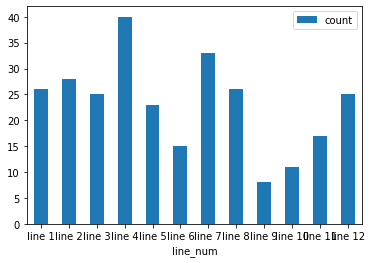

In [ ]:
# bar plot to show distribution of distinct words across all the lines
ax = df.plot.bar(x='line_num', y='count', rot=0)

In [ ]:
lines = text.split(sep='.')
lines = lines[:-1]

In [ ]:
# create list of tokens 
word_list = []
for line in lines:
  token_list = nltk.word_tokenize(line)
  for word in token_list:
    if word.isalnum():
      word_list.append(word)

# create bigrams with tokens
bigram = list(nltk.bigrams(word_list))

In [ ]:
# count the number of ('data', 'analytics') bigrams
cnt = 0
for grp in bigram:
  if grp[0] == 'data' and grp[1] == 'analytics':
    cnt += 1

# calculate the probability by divided to the total number of bigrams
print("probability when 'analytics' comes after 'data': ", round(((cnt/len(bigram))*100),2), "%")

probability when 'analytics' comes after 'data':  1.92 %
